In [50]:
import pandas as pd
import numpy as np

In [51]:
data = pd.read_csv(r"C:\Users\pc-pc\Downloads\advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [53]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [54]:
data.shape

(200, 4)

## Our task is to predict the sales. so we do the visuvalisation using a PAIR PLOT

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt 

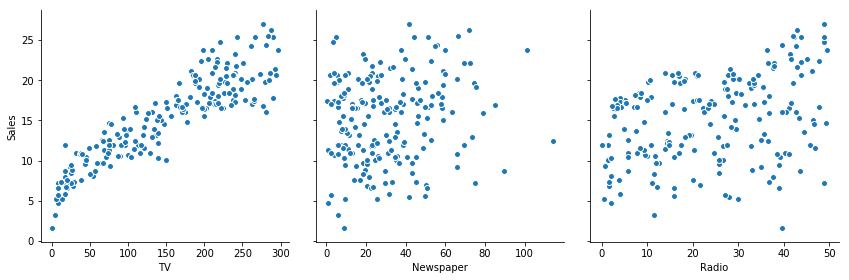

In [56]:
sns.pairplot(data, x_vars = ['TV','Newspaper','Radio'],y_vars = 'Sales', size=4, aspect=1)
plt.show()

### Now, to quantify this visual analysis, we can make use of a correlation matrix

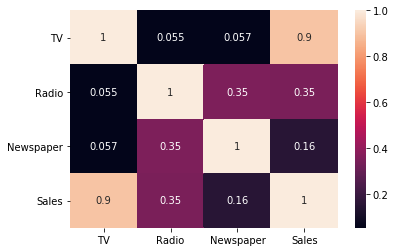

In [57]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Here, it is clearly seen that TV has a high correlation with the sales when compared to Newspaper and Radio

# 'TV' has the STRONGEST Association of ALL!

Now, Lets get into Business :P

Alright, Now, we saw that "TV" has the most strongest Association of all other variables. Hence, we shall construct a linear regression model between "TV" - "Sales". 

In [88]:
X = data['TV']
y = data['Sales']

# STEP 1 : TRAIN - TEST Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, test_size = 0.3, random_state=100)

In [61]:
print(X_train.shape)
print(y_train.shape)

(140,)
(140,)


# STEP 2 : BUILDING A LINEAR REGRESSION MODEL

#### The statsmodels.api gives us statsical functions to construct a linear model 

In [62]:
import statsmodels.api as sm

By default, the statsmodels.api will fit the line on dataset which passes through the origin.
Inorder to have an intercept, we have to manually specify the 'add_constant' function in the lib. 

In [63]:
X_train_sm = sm.add_constant(X_train)

In [64]:
# To fit the Regression line in the dataset
linearreg = sm.OLS(y_train, X_train_sm).fit()

In [65]:
linearreg.params

const    6.948683
TV       0.054546
dtype: float64

In [66]:
print("Intercept or Beta-1 :",linearreg.params[1])
print("coefficient or Beta-0 :", linearreg.params[0])

Intercept or Beta-1 : 0.054545752915907936
coefficient or Beta-0 : 6.9486832000013585


#### Now, The value of Beta-1 and Beta-0 is not sure if its correct. so, we need to look at the summary

In [67]:
print(linearreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.52e-52
Time:                        09:26:17   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [68]:
print("R-Squared : 0.816")             #<--- 81.6% of variance in Y has been explained by X in the model - GOOD FIT
print("F-statistic : 611.2")           #<--- Higher value is preferred for a GOOD MODEL
print("Prob (F-statistic) : 1.52e-52") #<--- It is almost close to 0. A very low value is preferred for a GOOD MODEL 

print("std-err : 0.002")               #<--- Very less value is preferred for a GOOD MODEL
print("t value : 24.722")       #<--- t = (coeff / stderr). the t-value is more than '2'. which is shows a good significance

R-Squared : 0.816
F-statistic : 611.2
Prob (F-statistic) : 1.52e-52
std-err : 0.002
t value : 24.722


## RESULT : THE LINEAR REGRESSION FIT IS PROVED TO BE SIGNIFICANT

# STEP 3 : PERFORMING SIMPLE LINEAR REGRESSION - TRAIN SET

# STEP 3(i) : FITTING THE LINE
Lets visuvalise how well the linear regression had fit the model. 
The Linear Regression line Equation : $ Sales = 6.948 + 0.054 \times TV $

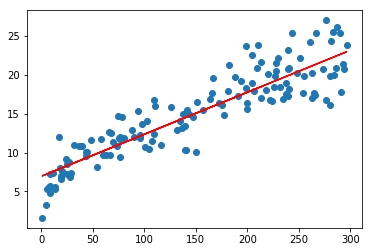

In [69]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

The residuals are normally distributed, and there are no visible patterns in the error terms (except for the fact that the variance seems to be increasing a little for the higher values). So, this model fit looks good. 

# STEP 3(ii) : RESIDUAL ANALYSIS

Residual Analysis is done to validate the assumptions (5 assumptions) of the linear regression model and hence we state that the constructed model is RELIABLE!

### DISTRIBUTION OF ERROR TERMS : (Check if the error terms are Normally Distributed)

In [70]:
y_train_pred = linearreg.predict(X_train_sm)
res = y_train - y_train_pred

C:\Users\pc-pc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\pc-pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


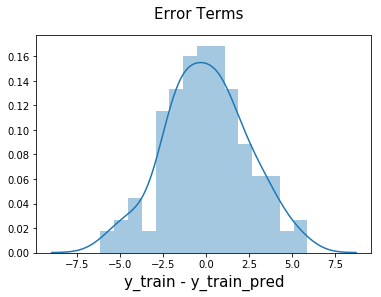

In [71]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

Lets look at the patters in residuals

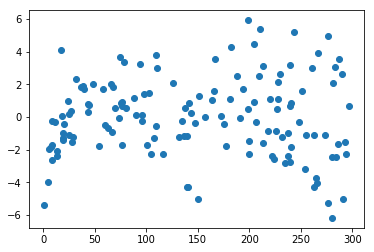

In [72]:
# res = y_train - y_train_pred. so, res is the residual
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

The variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

# STEP 4 : PREDICTIONS ON THE TEST SET

In [73]:
X_test_sm = sm.add_constant(X_test)

In [74]:
y_pred = linearreg.predict(X_test_sm)

### RMSE : Root Mean Square Error 
A model with low RMSE value is a GOOD model

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

### R-Squared : Residual's Square

In [77]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

### Visualizing the fit on the test set

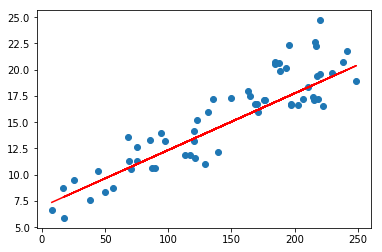

In [78]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

__________________________________________________________________________________________________________________

# LINEAR REGRESSION USING SKLEARN

_______________________________________________________________________________________________________________________

In [113]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [114]:
print(X_train_lm.shape)
print(X_test_lm.shape)

(140,)
(60,)


In [115]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [116]:
print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)
